### Estudando análise de dados de exportações brasileiras para França de 2016-2020

### Importando Bibliotecas

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

### Formatação

In [30]:
def formatar(valor):
    return f'${valor:,.2f}'

### Puxar base de dados e inspecionar

In [22]:
exportacoes_df = pd.read_csv('exportacoes_franca.csv')
display(exportacoes_df)
exportacoes_df.info()

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
1,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
3,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
...,...,...,...,...,...,...,...,...,...,...,...
142355,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",European Union (EU),2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400
142357,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,European Union (EU),27060,26400
142358,2020,12,France,Xapuri - AC,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,31111,23045


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142360 entries, 0 to 142359
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             142360 non-null  int64 
 1   Month            142360 non-null  int64 
 2   Country          142360 non-null  object
 3   City             142360 non-null  object
 4   SH4 Code         142360 non-null  int64 
 5   SH4 Description  142360 non-null  object
 6   SH2 Code         142360 non-null  int64 
 7   SH2 Description  142360 non-null  object
 8   Economic Block   142360 non-null  object
 9   US$ FOB          142360 non-null  int64 
 10  Net Weight       142360 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.9+ MB


Limpando informação duplicada do BLOCO ECONÔMICO

In [23]:
exportacoes_df = exportacoes_df.loc[exportacoes_df['Economic Block'] == 'Europe', :]
display(exportacoes_df)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
6,2016,1,France,Alta Floresta - MT,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,47828,28306
8,2016,1,France,Ananindeua - PA,1211,Plants and parts of plants (including seeds an...,12,"Oil seeds and oleaginous fruits; Grains, Seeds...",Europe,391,22
...,...,...,...,...,...,...,...,...,...,...,...
142350,2020,12,France,Vinhedo - SP,4016,Other articles of vulcanised rubber other than...,40,Rubber and articles thereof,Europe,136,0
142352,2020,12,France,Vinhedo - SP,6806,"Slag wool, rock wool and similar mineral wools...",68,"Articles of stone, plaster, cement, asbestos, ...",Europe,76,50
142354,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",Europe,2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400


### Informações Gerais

In [24]:
display(exportacoes_df.describe()) #informações estatísticas da tabela

,Year,Month,SH4 Code,SH2 Code,US$ FOB,Net Weight
count,71180.000000,71180.000000,71180.000000,71180.000000,7.118000e+04,7.118000e+04
mean,2018.065665,6.591922,6169.147246,61.516985,1.650039e+05,6.500505e+05
std,1.407976,3.462356,2655.080787,26.471474,1.247209e+06,9.875945e+06
min,2016.000000,1.000000,101.000000,1.000000,0.000000e+00,0.000000e+00
25%,2017.000000,4.000000,4009.000000,40.000000,4.170000e+02,3.000000e+00
50%,2018.000000,7.000000,7117.000000,71.000000,4.256500e+03,3.800000e+01
75%,2019.000000,10.000000,8483.000000,84.000000,3.710700e+04,3.185000e+03
max,2020.000000,12.000000,9999.000000,99.000000,1.086352e+08,7.100291e+08


Analisando os Quartis para os valores (US$ FOB	), vemos que os primeiros 50% dos dados estão numa ordem de grandeza, enquanto acima do terceiro quartil subimos a ordem de grandeza. 

visto que a média está em uma ordem de grandeza acima que o próprio terceiro quartil podemos ver que temos algumas transações de valores muito acima do que o padrão das transações à França

### Como foi a evolução das exportações para a frança ao longo dos anos?

,US$ FOB,Net Weight
Year,,
2016,2307750041,10899058259
2017,2224352728,11278264626
2018,2619712208,10452620066
2019,2609361806,8206207675
2020,1983797405,5434444024


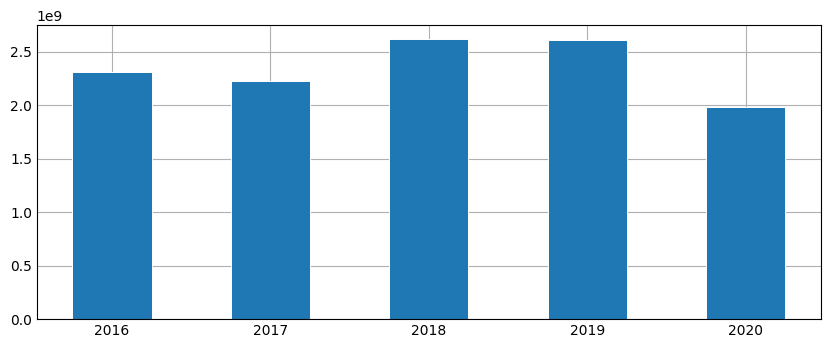

In [25]:
#usando GROUPBY

exportacoes_ano = exportacoes_df.groupby('Year').sum(numeric_only=True)
exportacoes_ano = exportacoes_ano[['US$ FOB','Net Weight']]
display(exportacoes_ano)

plt.style.use('_mpl-gallery')

# make data:
x = exportacoes_ano.index
y = exportacoes_ano['US$ FOB']

# plot
fig, ax = plt.subplots(figsize=(8,3))

ax.bar(x, y, width=0.5, edgecolor="white", linewidth=0.7)

plt.show()

Na escala de BILHÕES de reais, vemos uma crescente seguida de uma queda significativa em 2020, existe a hipótese da pandemia ter afetado diretamente as importações do Brasil para a França, mas é necessário avançar as análises para ter certeza

### Quais os produtos mais exportados em 2020?

In [34]:
exportacoes_produto = exportacoes_df.loc[exportacoes_df['Year'] == 2020, :]
exportacoes_produto = exportacoes_produto.groupby('SH4 Description').sum(numeric_only=True)
exportacoes_produto = exportacoes_produto[['US$ FOB']]
exportacoes_produto = exportacoes_produto.sort_values('US$ FOB', ascending=False).map(formatar)
display(exportacoes_produto)

,US$ FOB
SH4 Description,
"Soybean oilcake and other solid residue, wh/not ground","$541,111,162.00"
"Iron ores and concentrates, including roasted iron pyrites","$190,846,648.00"
"Chemical wood pulp, soda or sulphate, other than dissolving grades","$124,320,073.00"
"Coffee, whether or not roasted or decaffeinated; coffee husks and skins; coffee substitutes containing coffee in any proportion","$104,684,468.00"
Crude oil from petroleum and bituminous minerals,"$99,923,601.00"
...,...
"Pencils (other than pencils of heading 9608), crayons, pencil leads, pastels, drawing charcoals, writing or drawing chalks and tailors' chalks",$3.00
Drawing or colouring books for children,$3.00
"Glands and other organs for organo-therapeutic uses, dried, whether or not powdered; extracts of glands or other organs or of their secretions for organo-therapeutic uses; heparin and its salts; other human or animal substances prepared for therapeutic or",$2.00


as 5 maiores fontes de exportação em dólar são:
* Óleo de soja e derivados
* Minérios de ferro
* Compostos químicos derivados da madeira
* Café
* Petróleo puro

### Em 2020 qual cidade mais exportou para a França?

In [35]:
cidades_exportadoras = exportacoes_df.loc[exportacoes_df['Year'] == 2020, :] #O filtro precisa ser feito antes, senão outros anos entram no método groupby
cidades_exportadoras = cidades_exportadoras.groupby('City').sum(numeric_only=True)
cidades_exportadoras = cidades_exportadoras[['US$ FOB']]
cidades_exportadoras = cidades_exportadoras.sort_values('US$ FOB', ascending=False).map(formatar)
display(cidades_exportadoras)

,US$ FOB
City,
Duque de Caxias - RJ,"$139,702,798.00"
Luís Eduardo Magalhães - BA,"$132,664,066.00"
Ponta Grossa - PR,"$93,888,508.00"
São José dos Campos - SP,"$86,469,638.00"
Rio de Janeiro - RJ,"$61,261,107.00"
...,...
Não-Me-Toque - RS,$21.00
Cubatão - SP,$20.00
Holambra - SP,$5.00


Os 5 produtos mais exportados para França são voltados à matéria prima, o que foge do escopo de grandes capitais, então faz todo sentido cidades do interior terem destaque 

### O que as 2 maiores cidades exportaram tanto?

In [36]:
#Duque de Caxias:
caxias = exportacoes_df.loc[exportacoes_df['Year'] == 2020, :]
caxias = caxias.loc[caxias['City'] == 'Duque de Caxias - RJ']
caxias = caxias.sort_values('US$ FOB', ascending=False)
display(caxias)

caxias = caxias.groupby('SH4 Description').sum(numeric_only=True)
caxias = caxias.sort_values('US$ FOB', ascending=False)
caxias = caxias[['US$ FOB']].map(formatar)
display(caxias)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
79600,2020,7,France,Duque de Caxias - RJ,2709,Crude oil from petroleum and bituminous minerals,27,"Mineral fuels, mineral oils, bituminous substa...",Europe,33610511,119402538
127026,2020,11,France,Duque de Caxias - RJ,8411,"Turbo-jets, turbo-propellers and other gas tur...",84,"Nuclear reactors, boilers, machinery and mecha...",Europe,11349341,1117
114984,2020,10,France,Duque de Caxias - RJ,8411,"Turbo-jets, turbo-propellers and other gas tur...",84,"Nuclear reactors, boilers, machinery and mecha...",Europe,9926360,655
68340,2020,6,France,Duque de Caxias - RJ,8411,"Turbo-jets, turbo-propellers and other gas tur...",84,"Nuclear reactors, boilers, machinery and mecha...",Europe,8064617,587
32992,2020,3,France,Duque de Caxias - RJ,8411,"Turbo-jets, turbo-propellers and other gas tur...",84,"Nuclear reactors, boilers, machinery and mecha...",Europe,7241473,880
...,...,...,...,...,...,...,...,...,...,...,...
139820,2020,12,France,Duque de Caxias - RJ,7505,"Nickel bars, rods, profiles and wire",75,Nickel and articles thereof,Europe,20,0
56766,2020,5,France,Duque de Caxias - RJ,4823,"Other paper, paperboard, cellulose wadding and...",48,"Paper and paperboard; articles of paper pulp, ...",Europe,14,0
139818,2020,12,France,Duque de Caxias - RJ,7419,Other articles of copper,74,Copper and articles thereof,Europe,9,0
91644,2020,8,France,Duque de Caxias - RJ,7419,Other articles of copper,74,Copper and articles thereof,Europe,4,0


,US$ FOB
SH4 Description,
"Turbo-jets, turbo-propellers and other gas turbines","$82,490,516.00"
Crude oil from petroleum and bituminous minerals,"$33,610,511.00"
"Transmission shafts (including cam shafts and crank shafts) and cranks; bearing housings and plain shaft bearings; gears and gearing; ball or roller screws; gear boxes and other speed changers, including torque converters; flywheels and pulleys, including","$4,897,696.00"
Ball or roller bearings,"$4,123,545.00"
"Screws, bolts, nuts, coach screws, screw hooks, rivets, cotters, cotter-pins, washers (including spring washers) and similar articles, of iron or steel","$2,109,423.00"
"Soybean oilcake and other solid residue, wh/not ground","$2,007,137.00"
Other articles of nickel,"$1,475,623.00"
Other articles of iron or steel,"$1,423,564.00"
"Taps, cocks, valves and similar appliances for pipes, boiler shells, tanks, vats or the like, including pressure-reducing valves and thermostatically controlled valves","$1,028,261.00"


Após algumas pesquisas, existe uma empresa de sistemas aéreos não tripulados (drones) em Duque de Caxias, a empresa chamada Stella Tecnologia, e tem grande potencial de ser a fonte dessas exportações

In [40]:
#Luis Eduardo
luis_eduardo = exportacoes_df.loc[exportacoes_df['Year'] == 2020, :]
luis_eduardo = luis_eduardo.loc[luis_eduardo['City'] == 'Luís Eduardo Magalhães - BA']
luis_eduardo = luis_eduardo.sort_values('US$ FOB', ascending=False)
display(luis_eduardo)

luis_eduardo = luis_eduardo.groupby('SH4 Description').sum(numeric_only=True)
luis_eduardo = luis_eduardo[['US$ FOB']].map(formatar)
display(luis_eduardo)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
127706,2020,11,France,Luís Eduardo Magalhães - BA,2304,"Soybean oilcake and other solid residue, wh/no...",23,Residues and waste from the food industries; o...,Europe,25083499,62868884
80302,2020,7,France,Luís Eduardo Magalhães - BA,2304,"Soybean oilcake and other solid residue, wh/no...",23,Residues and waste from the food industries; o...,Europe,19890734,67825634
9440,2020,1,France,Luís Eduardo Magalhães - BA,2304,"Soybean oilcake and other solid residue, wh/no...",23,Residues and waste from the food industries; o...,Europe,19804331,60087780
103928,2020,9,France,Luís Eduardo Magalhães - BA,2304,"Soybean oilcake and other solid residue, wh/no...",23,Residues and waste from the food industries; o...,Europe,19665462,64078054
115614,2020,10,France,Luís Eduardo Magalhães - BA,2304,"Soybean oilcake and other solid residue, wh/no...",23,Residues and waste from the food industries; o...,Europe,17581183,59401908
45600,2020,4,France,Luís Eduardo Magalhães - BA,2304,"Soybean oilcake and other solid residue, wh/no...",23,Residues and waste from the food industries; o...,Europe,17164605,54682876
57286,2020,5,France,Luís Eduardo Magalhães - BA,2304,"Soybean oilcake and other solid residue, wh/no...",23,Residues and waste from the food industries; o...,Europe,13460090,44276266
92288,2020,8,France,Luís Eduardo Magalhães - BA,807,Melons (including watermelons) and papaws (pap...,8,Edible fruit and nuts; peel of citrus fruits o...,Europe,6677,5347
68998,2020,6,France,Luís Eduardo Magalhães - BA,807,Melons (including watermelons) and papaws (pap...,8,Edible fruit and nuts; peel of citrus fruits o...,Europe,4915,4131
80300,2020,7,France,Luís Eduardo Magalhães - BA,807,Melons (including watermelons) and papaws (pap...,8,Edible fruit and nuts; peel of citrus fruits o...,Europe,2570,2106


,US$ FOB
SH4 Description,
"Melons (including watermelons) and papaws (papayas), fresh","$14,162.00"
"Soybean oilcake and other solid residue, wh/not ground","$132,649,904.00"
